In [46]:
# import package
import pandas as pd
import os
import math
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Get TEJ TSMC's stock data
stock_data = pd.read_excel("台積電2020報酬率&股價.xlsx")

# Put Price and return into two different list
stock_return = list(stock_data["日報酬率 %"])
stock_price = list(stock_data["未調整收盤價(元)"])

In [48]:
#Compute the stock's volatility and mean return in 2020

# Mean of Return
mean_return = sum(stock_return) / len(stock_return)

# Volatility
X_bar = sum(stock_price) / len(stock_price)
Xi = []
for i in range(len(stock_price) - 1):
    x = np.log(stock_price[i+1]/stock_price[i])
    x = x ** 2
    Xi.append(x)
    
volatility = math.sqrt(sum(Xi))

print("Mean of Stock return : " , mean_return)
print("2020 year Stock volatility  : " , volatility)

Mean of Stock return :  0.22166816326530597
2020 year Stock volatility  :  0.2962571110599736


In [49]:
# Predict data
stock_data = pd.read_excel("台積電2021報酬率&股價.xlsx")
stock_price_2021 = list(stock_data["未調整收盤價(元)"])

In [50]:
#%%

# Monte Carlo Simulation

# ds / s  = u * dt + vol * epsilon * sqrt(dt)

# s = initial price 
s = stock_price_2021[0]

#  u = Mean of Return

# dt = time interval
dt = 1 / len(stock_price)

# vol = volatility

# Function to predict stock price
def monte_carlo(s):
    # epsilon = sample of standard normal distribution
    epsilon = np.random.normal(0,1)
    ds = ((mean_return * dt) + (volatility * epsilon * math.sqrt(dt))) * s
    s += ds
    return(s)


In [51]:
# predict the stock price in 2021

stock_price_predict = []

#  stock market open 242 days
for i in range(0,242):
    s = int(monte_carlo(s))
    stock_price_predict.append(s)

In [52]:
'''
# Get Stock market open date

DatePeriod = pd.date_range("2021/1/1", "2021/12/31", freq='B')
DatePeriod = list(DatePeriod.strftime('%Y-%m-%d'))

date_remove = ["2021-01-01","2021-01-04","2021-02-04",'2021-02-05',
               "2021-02-09","2021-02-10","2021-02-11",'2021-02-12',
               "2021-02-15","2021-02-16","2021-02-17",'2021-03-01',
               "2021-04-02","2021-04-05","2021-04-30",'2021-06-14',
               "2021-09-20","2021-09-21","2021-10-10",'2021-12-31']

Date = []
for m in DatePeriod:
	if m not in date_remove:
		Date.append(m)
'''
month = np.arange(1,12)

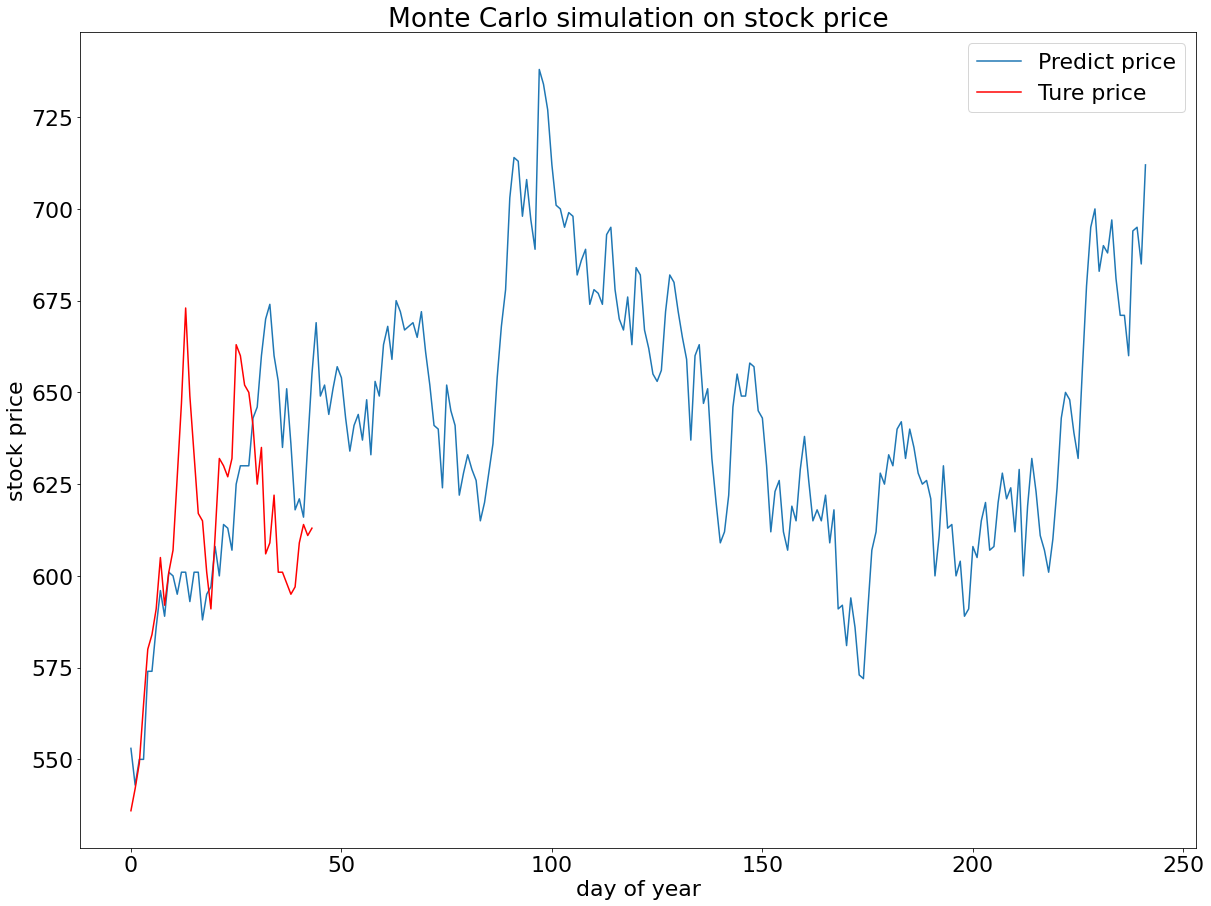

In [53]:
#%%
plt.rcParams.update({'font.size': 22})
# Visualization
    
plt.figure(figsize=(20,15))
plt.plot(stock_price_predict, label = "Predict price")
plt.plot(stock_price_2021 , color = "r" , label = "Ture price")
plt.xlabel("day of year")
plt.ylabel("stock price")
plt.title("Monte Carlo simulation on stock price") 
plt.legend()
plt.show()